In [6]:
import swarm
import numpy as np
import sys
import importlib
sys.path.append("../../problems")
import hillclimbing
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
n_particles = 5

pos = np.random.rand(3, n_particles)
vel = np.random.randn(2, n_particles)*.1
best = np.ones_like(pos)*(-np.inf)
glob = np.ones((3, 1))*(-np.inf)
print(pos)
print(vel)
print(glob)
print(*pos.shape)

[[0.22804101 0.75014077 0.99161727 0.17794522 0.50119813]
 [0.86637974 0.02488377 0.48146061 0.8655133  0.91099603]
 [0.66617061 0.68471452 0.54703148 0.14537776 0.80956606]]
[[ 0.0503659   0.06838252 -0.04679882  0.01518502 -0.0004962 ]
 [ 0.1195095  -0.16892495  0.04331974  0.15650067  0.04057689]]
[[-inf]
 [-inf]
 [-inf]]
3 5


In [3]:
# Test that evaluation modifies
importlib.reload(swarm)
pos = np.random.rand(3, n_particles)
print(pos)
swarm.reevaluate(pos, best, glob, hillclimbing.fivepeaks)
print(pos)
print(best)

[[0.08947396 0.3809833  0.80534096 0.95083106 0.45425617]
 [0.25133873 0.03155986 0.67364965 0.56247399 0.10348687]
 [0.76470627 0.01125193 0.96204977 0.68293227 0.91665001]]
[[ 0.08947396  0.3809833   0.80534096  0.95083106  0.45425617]
 [ 0.25133873  0.03155986  0.67364965  0.56247399  0.10348687]
 [ 0.07138381 -0.00277276  0.03860729 -0.20394589 -0.056597  ]]
[[ 0.08947396  0.3809833   0.80534096  0.95083106  0.45425617]
 [ 0.25133873  0.03155986  0.67364965  0.56247399  0.10348687]
 [ 0.07138381 -0.00277276  0.03860729 -0.20394589 -0.056597  ]]


In [9]:
importlib.reload(swarm)
swarm.get_acc(pos, best, glob, 2, 2)

array([[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf],
       [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
        -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf]])

MovieWriter imagemagick unavailable; using Pillow instead.


PSO found best solution at f([0.84157313 0.8477568 ])=0.7710707917264085


NameError: name 'x_min' is not defined

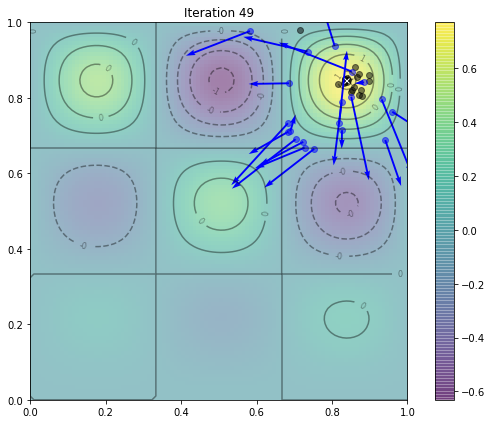

In [12]:

importlib.reload(swarm)

n_particles = 20

pos = np.random.rand(3, n_particles)
vel = np.random.randn(2, n_particles)*.05
best = np.ones_like(pos)*(-np.inf)
glob = np.ones((3, 1))*(-np.inf)

x, y = np.array(np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100)))
z = hillclimbing.fivepeaks(x, y)
 
# Find the global minimum
x_max = x.ravel()[z.argmax()]
y_max = y.ravel()[z.argmax()]

fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 1, 0, 1], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_max], [y_max], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(best[0], best[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(pos[0], pos[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(pos[0], pos[1], vel[0], vel[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([glob[0]], [glob[1]], marker='*', s=100, color='black', alpha=0.4)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
 
def animate(i):
    "Steps of PSO: algorithm update and show in plot"
    title = 'Iteration {:02d}'.format(i)
    # Update params
    swarm.classic_update(pos,vel, best, glob, [0,1,0,1], hillclimbing.fivepeaks)
    # Set picture
    ax.set_title(title)
    pbest_plot.set_offsets(best[0:2].T)
    p_plot.set_offsets(pos[0:2].T)
    p_arrow.set_offsets(pos[0:2].T)
    p_arrow.set_UVC(vel[0], vel[1])
    gbest_plot.set_offsets(glob[0:2].reshape(1,-1))
    return ax, pbest_plot, p_plot, p_arrow, gbest_plot
 
anim = FuncAnimation(fig, animate, frames=list(range(1,50)), interval=500, blit=False, repeat=True)
anim.save("PSO.gif", dpi=120, writer="imagemagick")
 
print("PSO found best solution at f({})={}".format(glob[0:2,0], glob[2,0]))
print("Global optimal at f({})={}".format([x_max,y_max], hillclimbing.fivepeaks(x_max,y_max)))